In [1]:
import pandas as pd
import numpy as np
from matplotlib import style
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf


%matplotlib inline

In [2]:
path="/Users/effie/Desktop/term3/research_module/data/"
data=pd.read_stata(path+"county_clean/total_and_by_industry_data_county.dta")
data=data.drop(columns=['index'])

In [3]:
query_data = data.query('No_ratio>0.286')
data.loc[:,'county_affected_no'] = data.index.map(lambda x : 1 if x in query_data.index else 0)

query_data = data.query('toas_ratio>0.627')
data.loc[:,'county_affected_toas'] = data.index.map(lambda x : 1 if x in query_data.index else 0)

query_data = data.query('year>2008')
data.loc[:,'year_post'] = data.index.map(lambda x : 1 if x in query_data.index else 0)

In [4]:
data["affected_after_no"] = data.county_affected_no*data.year_post
data["affected_after_toas"] = data.county_affected_toas*data.year_post
data["ln_res"]=np.log(data["resident"]*1000)

data["ln_gdp_level"] = np.log(data.gdp_level*1000000)
data["ln_gdp_per_inhabitant"] = np.log(data.gdp_per_inhabitant)
data["ln_gdp_per_employee"] = np.log(data.gdp_per_employee)

data["ln_gva_level"] = np.log(data.gva_level*1000000)
data["ln_gva_agr"] = np.log(data.gva_agr*1000000)
data["ln_gva_man"] = np.log(data.gva_man*1000000)
data["ln_gva_ser"] = np.log(data.gva_ser*1000000)
data["ln_gva_ser_fin"] = np.log(data.gva_ser_fin*1000000)
data["ln_gva_ser_trade"] = np.log(data.gva_ser_trade*1000000)
data["ln_gva_ser_public"] = np.log(data.gva_ser_public*1000000)

data["ln_emp"]=np.log(data["employee"]*1000)

data["ln_emp_ser_fin"] = np.log(data.emp_ser_fin*1000)
data["ln_emp_ser_trade"] = np.log(data.emp_ser_trade*1000)
data["ln_emp_ser_public"] = np.log(data.emp_ser_public*1000)
data["ln_emp_agr"]=np.log(data["emp_agr"]*1000)
data["ln_emp_man"]=np.log(data["emp_man"]*1000)
data["ln_emp_ser"]=np.log(data["emp_ser"]*1000)

data["ln_vow"]=np.log(data["volume_of_work"]*1000000)

data["ln_vow_ser_fin"] = np.log(data.vow_ser_fin*1000000)
data["ln_vow_ser_trade"] = np.log(data.vow_ser_trade*1000000)
data["ln_vow_ser_public"] = np.log(data.vow_ser_public*1000000)
data["ln_vow_agr"]=np.log(data["vow_agr"]*1000000)
data["ln_vow_man"]=np.log(data["vow_man"]*1000000)
data["ln_vow_ser"]=np.log(data["vow_ser"]*1000000)

data["ln_fixed_total"] = np.log(data.fixed_total*1000000)
data["ln_fixed_ser_fin"] = np.log(data.fixed_ser_fin*1000000)
data["ln_fixed_ser_fin"] = np.log(data.fixed_ser_fin*1000000)
data["ln_fixed_ser_trade"] = np.log(data.fixed_ser_trade*1000000)
data["ln_fixed_ser_public"] = np.log(data.fixed_ser_public*1000000)
data["ln_fixed_agr"]=np.log(data["fixed_agr"]*1000000)
data["ln_fixed_man"]=np.log(data["fixed_man"]*1000000)
data["ln_fixed_ser"]=np.log(data["fixed_ser"]*1000000)

/Users/effie/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [5]:
data

,year,Gebietseinheit,EU_Code,Regional_key,Land,resident,ln_gdp,gdp_level,gdp_per_inhabitant,gdp_per_employee,...,ln_vow_agr,ln_vow_man,ln_vow_ser,ln_fixed_total,ln_fixed_ser_fin,ln_fixed_ser_trade,ln_fixed_ser_public,ln_fixed_agr,ln_fixed_man,ln_fixed_ser
0,2004,"Stuttgart, Landeshauptstadt, Stadtkreis",DE111,08111,BW,573.955017,-1.059015,40680.228,70877.0,85811.0,...,14.475618,18.865405,20.105983,24.950936,24.075167,22.963721,22.949218,20.168262,23.756601,24.578018
1,2004,"Böblingen, Landkreis",DE112,08115,BW,366.351990,-3.269339,14478.332,39520.0,67825.0,...,14.558400,18.736418,18.939897,24.950936,24.075167,22.963721,22.949218,20.168262,23.756601,24.578018
2,2004,"Esslingen, Landkreis",DE113,08116,BW,503.649994,-0.074150,15205.272,30190.0,61149.0,...,14.902725,18.766969,19.170997,24.950936,24.075167,22.963721,22.949218,20.168262,23.756601,24.578018
3,2004,"Göppingen, Landkreis",DE114,08117,BW,255.177994,-0.930964,6158.588,24134.0,54533.0,...,14.963865,18.036458,18.304630,24.950936,24.075167,22.963721,22.949218,20.168262,23.756601,24.578018
4,2004,"Ludwigsburg, Landkreis",DE115,08118,BW,504.459991,0.341932,15851.325,31422.0,67176.0,...,15.669149,18.615310,19.154826,24.950936,24.075167,22.963721,22.949218,20.168262,23.756601,24.578018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3586,2012,Saale-Orla-Kreis,DEG0K,16075,TH,84.847000,5.540099,1955.848,23051.0,48013.0,...,NaN,NaN,NaN,23.172179,22.076258,21.326727,21.618260,19.454235,21.870640,22.820639
3587,2012,"Greiz, Landkreis",DEG0L,16076,TH,103.880997,2.040082,1854.354,17851.0,46776.0,...,NaN,NaN,NaN,23.172179,22.076258,21.326727,21.618260,19.454235,21.870640,22.820639
3588,2012,"Altenburger Land, Landkreis",DEG0M,16077,TH,95.289001,-1.616072,1689.681,17732.0,45168.0,...,NaN,NaN,NaN,23.172179,22.076258,21.326727,21.618260,19.454235,21.870640,22.820639
3589,2012,"Eisenach, Kreisfreie Stadt",DEG0N,16056,TH,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,23.172179,22.076258,21.326727,21.618260,19.454235,21.870640,22.820639


# employee  -no

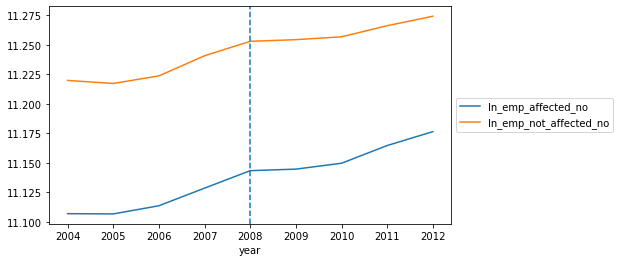

In [6]:
emp_affected_no = data[data["county_affected_no"]==1].groupby('year').mean()['ln_emp'].rename("ln_emp_affected_no") 
emp_not_affected_no = data[data["county_affected_no"]==0].groupby('year').mean()['ln_emp'].rename("ln_emp_not_affected_no")
empl_no = pd.concat([emp_affected_no, emp_not_affected_no], axis=1) 
fig, ax = plt.subplots(figsize=(9,4))
empl_no.plot(ax=ax)
ax.axvline(2008, linestyle='--')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

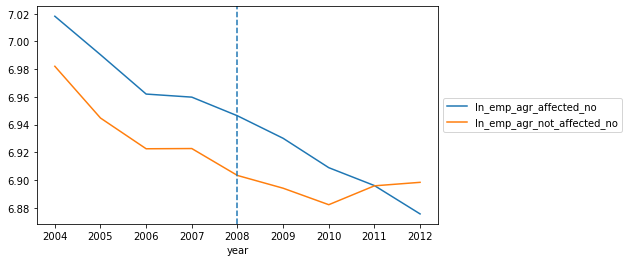

In [7]:
emp_agr_affected_no = data[data["county_affected_no"]==1].groupby('year').mean()['ln_emp_agr'].rename("ln_emp_agr_affected_no") 
emp_agr_not_affected_no = data[data["county_affected_no"]==0].groupby('year').mean()['ln_emp_agr'].rename("ln_emp_agr_not_affected_no")
emp_agr_no = pd.concat([emp_agr_affected_no, emp_agr_not_affected_no], axis=1) 
fig, ax = plt.subplots(figsize=(9,4))
emp_agr_no.plot(ax=ax)
ax.axvline(2008, linestyle='--')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

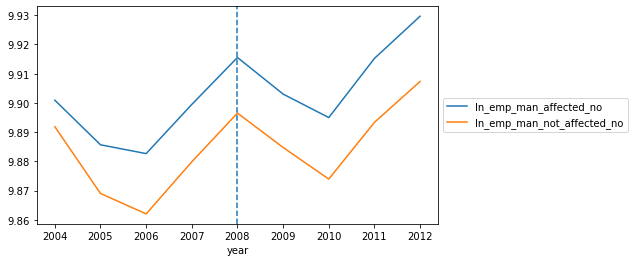

In [8]:
emp_man_affected_no = data[data["county_affected_no"]==1].groupby('year').mean()['ln_emp_man'].rename("ln_emp_man_affected_no") 
emp_man_not_affected_no = data[data["county_affected_no"]==0].groupby('year').mean()['ln_emp_man'].rename("ln_emp_man_not_affected_no")
emp_man_no = pd.concat([emp_man_affected_no, emp_man_not_affected_no], axis=1) 
fig, ax = plt.subplots(figsize=(9,4))
emp_man_no.plot(ax=ax)
ax.axvline(2008, linestyle='--')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

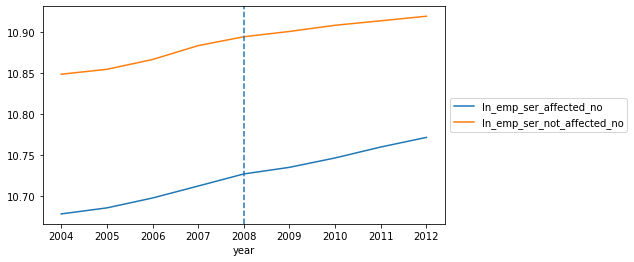

In [9]:
emp_ser_affected_no = data[data["county_affected_no"]==1].groupby('year').mean()['ln_emp_ser'].rename("ln_emp_ser_affected_no") 
emp_ser_not_affected_no = data[data["county_affected_no"]==0].groupby('year').mean()['ln_emp_ser'].rename("ln_emp_ser_not_affected_no")
emp_ser_no = pd.concat([emp_ser_affected_no, emp_ser_not_affected_no], axis=1) 
fig, ax = plt.subplots(figsize=(9,4))
emp_ser_no.plot(ax=ax)
ax.axvline(2008, linestyle='--')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

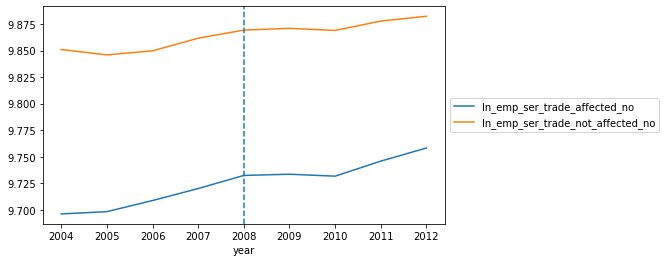

In [10]:
emp_ser_trade_affected_no = data[data["county_affected_no"]==1].groupby('year').mean()['ln_emp_ser_trade'].rename("ln_emp_ser_trade_affected_no") 
emp_ser_trade_not_affected_no = data[data["county_affected_no"]==0].groupby('year').mean()['ln_emp_ser_trade'].rename("ln_emp_ser_trade_not_affected_no")
emp_ser_trade_no = pd.concat([emp_ser_trade_affected_no, emp_ser_trade_not_affected_no], axis=1) 
fig, ax = plt.subplots(figsize=(9,4))
emp_ser_trade_no.plot(ax=ax)
ax.axvline(2008, linestyle='--')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

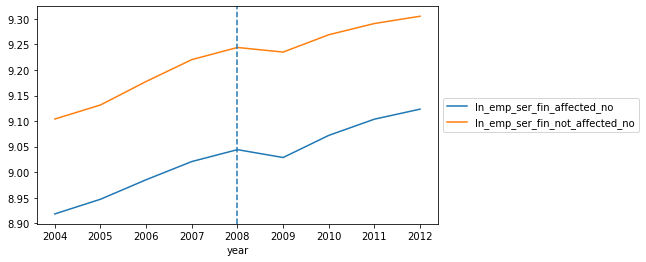

In [11]:
emp_ser_fin_affected_no = data[data["county_affected_no"]==1].groupby('year').mean()['ln_emp_ser_fin'].rename("ln_emp_ser_fin_affected_no") 
emp_ser_fin_not_affected_no = data[data["county_affected_no"]==0].groupby('year').mean()['ln_emp_ser_fin'].rename("ln_emp_ser_fin_not_affected_no")
emp_ser_fin_no = pd.concat([emp_ser_fin_affected_no, emp_ser_fin_not_affected_no], axis=1) 
fig, ax = plt.subplots(figsize=(9,4))
emp_ser_fin_no.plot(ax=ax)
ax.axvline(2008, linestyle='--')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

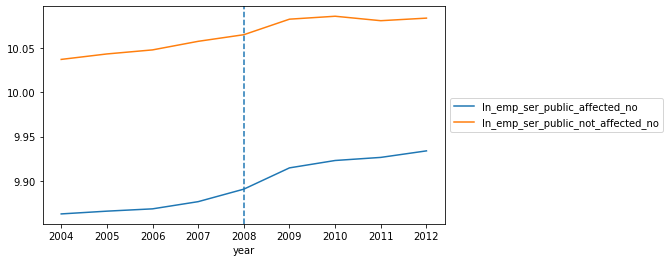

In [12]:
emp_ser_public_affected_no = data[data["county_affected_no"]==1].groupby('year').mean()['ln_emp_ser_public'].rename("ln_emp_ser_public_affected_no") 
emp_ser_public_not_affected_no = data[data["county_affected_no"]==0].groupby('year').mean()['ln_emp_ser_public'].rename("ln_emp_ser_public_not_affected_no")
emp_ser_public_no = pd.concat([emp_ser_public_affected_no, emp_ser_public_not_affected_no], axis=1) 
fig, ax = plt.subplots(figsize=(9,4))
emp_ser_public_no.plot(ax=ax)
ax.axvline(2008, linestyle='--')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# employee toas

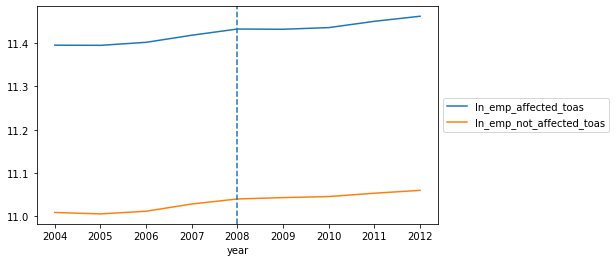

In [13]:
emp_affected_toas = data[data["county_affected_toas"]==1].groupby('year').mean()['ln_emp'].rename("ln_emp_affected_toas") 
emp_not_affected_toas = data[data["county_affected_toas"]==0].groupby('year').mean()['ln_emp'].rename("ln_emp_not_affected_toas")
emp_toas = pd.concat([emp_affected_toas, emp_not_affected_toas], axis=1) 
fig, ax = plt.subplots(figsize=(9,4))
emp_toas.plot(ax=ax)
ax.axvline(2008, linestyle='--')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

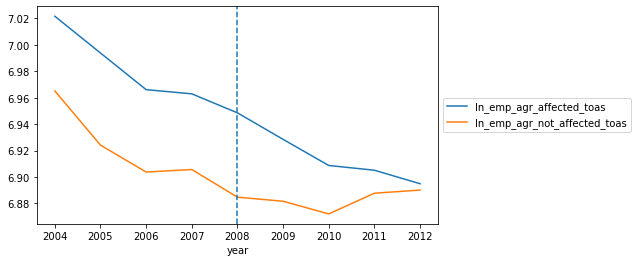

In [14]:
emp_agr_affected_toas = data[data["county_affected_toas"]==1].groupby('year').mean()['ln_emp_agr'].rename("ln_emp_agr_affected_toas") 
emp_agr_not_affected_toas = data[data["county_affected_toas"]==0].groupby('year').mean()['ln_emp_agr'].rename("ln_emp_agr_not_affected_toas")
emp_agr_toas = pd.concat([emp_agr_affected_toas, emp_agr_not_affected_toas], axis=1) 
fig, ax = plt.subplots(figsize=(9,4))
emp_agr_toas.plot(ax=ax)
ax.axvline(2008, linestyle='--')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

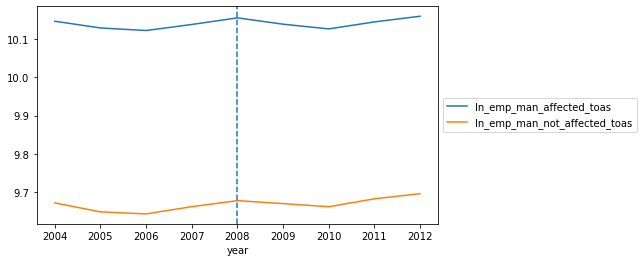

In [15]:
emp_man_affected_toas = data[data["county_affected_toas"]==1].groupby('year').mean()['ln_emp_man'].rename("ln_emp_man_affected_toas") 
emp_man_not_affected_toas = data[data["county_affected_toas"]==0].groupby('year').mean()['ln_emp_man'].rename("ln_emp_man_not_affected_toas")
emp_man_toas = pd.concat([emp_man_affected_toas, emp_man_not_affected_toas], axis=1) 
fig, ax = plt.subplots(figsize=(9,4))
emp_man_toas.plot(ax=ax)
ax.axvline(2008, linestyle='--')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

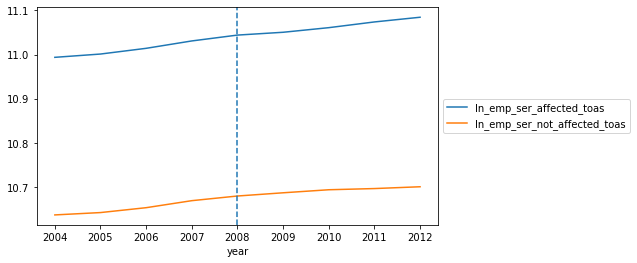

In [16]:
emp_ser_affected_toas = data[data["county_affected_toas"]==1].groupby('year').mean()['ln_emp_ser'].rename("ln_emp_ser_affected_toas") 
emp_ser_not_affected_toas = data[data["county_affected_toas"]==0].groupby('year').mean()['ln_emp_ser'].rename("ln_emp_ser_not_affected_toas")
emp_ser_toas = pd.concat([emp_ser_affected_toas, emp_ser_not_affected_toas], axis=1) 
fig, ax = plt.subplots(figsize=(9,4))
emp_ser_toas.plot(ax=ax)
ax.axvline(2008, linestyle='--')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

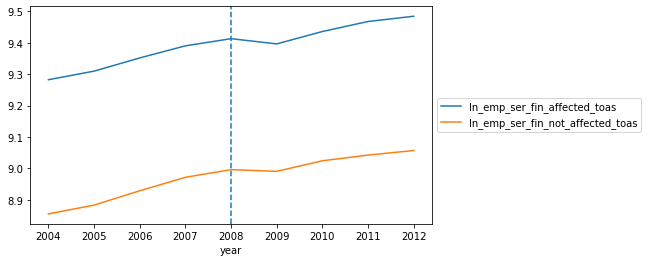

In [17]:
emp_ser_fin_affected_toas = data[data["county_affected_toas"]==1].groupby('year').mean()['ln_emp_ser_fin'].rename("ln_emp_ser_fin_affected_toas") 
emp_ser_fin_not_affected_toas = data[data["county_affected_toas"]==0].groupby('year').mean()['ln_emp_ser_fin'].rename("ln_emp_ser_fin_not_affected_toas")
emp_ser_fin_toas = pd.concat([emp_ser_fin_affected_toas, emp_ser_fin_not_affected_toas], axis=1) 
fig, ax = plt.subplots(figsize=(9,4))
emp_ser_fin_toas.plot(ax=ax)
ax.axvline(2008, linestyle='--')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

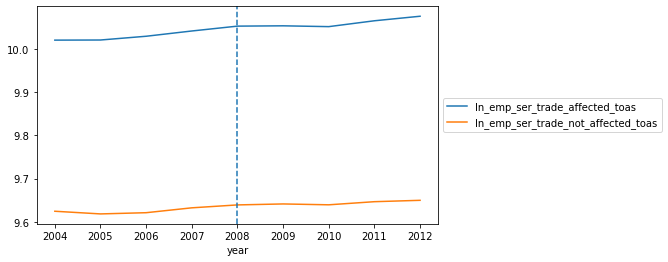

In [18]:
emp_ser_trade_affected_toas = data[data["county_affected_toas"]==1].groupby('year').mean()['ln_emp_ser_trade'].rename("ln_emp_ser_trade_affected_toas") 
emp_ser_trade_not_affected_toas = data[data["county_affected_toas"]==0].groupby('year').mean()['ln_emp_ser_trade'].rename("ln_emp_ser_trade_not_affected_toas")
emp_ser_trade_toas = pd.concat([emp_ser_trade_affected_toas, emp_ser_trade_not_affected_toas], axis=1) 
fig, ax = plt.subplots(figsize=(9,4))
emp_ser_trade_toas.plot(ax=ax)
ax.axvline(2008, linestyle='--')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

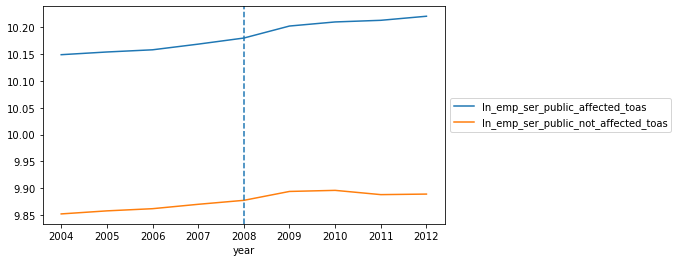

In [19]:
emp_ser_public_affected_toas = data[data["county_affected_toas"]==1].groupby('year').mean()['ln_emp_ser_public'].rename("ln_emp_ser_public_affected_toas") 
emp_ser_public_not_affected_toas = data[data["county_affected_toas"]==0].groupby('year').mean()['ln_emp_ser_public'].rename("ln_emp_ser_public_not_affected_toas")
emp_ser_public_toas = pd.concat([emp_ser_public_affected_toas, emp_ser_public_not_affected_toas], axis=1) 
fig, ax = plt.subplots(figsize=(9,4))
emp_ser_public_toas.plot(ax=ax)
ax.axvline(2008, linestyle='--')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# gva  no



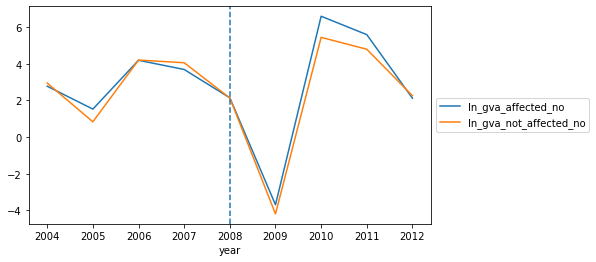

In [20]:
gva_affected_no = data[data["county_affected_no"]==1].groupby('year').mean()['ln_gva'].rename("ln_gva_affected_no") 
gva_not_affected_no = data[data["county_affected_no"]==0].groupby('year').mean()['ln_gva'].rename("ln_gva_not_affected_no")
gval = pd.concat([gva_affected_no, gva_not_affected_no], axis=1) 
fig, ax = plt.subplots(figsize=(9,4))
gval.plot(ax=ax)
ax.axvline(2008, linestyle='--')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

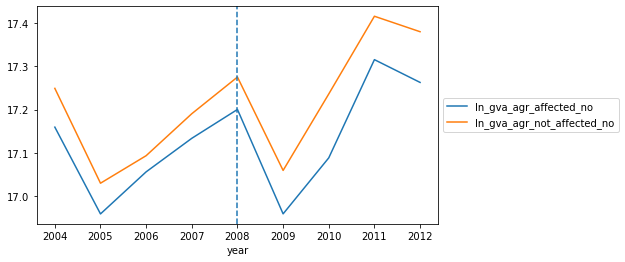

In [21]:
gva_agr_affected_no = data[data["county_affected_no"]==1].groupby('year').mean()['ln_gva_agr'].rename("ln_gva_agr_affected_no") 
gva_agr_not_affected_no = data[data["county_affected_no"]==0].groupby('year').mean()['ln_gva_agr'].rename("ln_gva_agr_not_affected_no")
gva_agr_no = pd.concat([gva_agr_affected_no, gva_agr_not_affected_no], axis=1) 
fig, ax = plt.subplots(figsize=(9,4))
gva_agr_no.plot(ax=ax)
ax.axvline(2008, linestyle='--')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

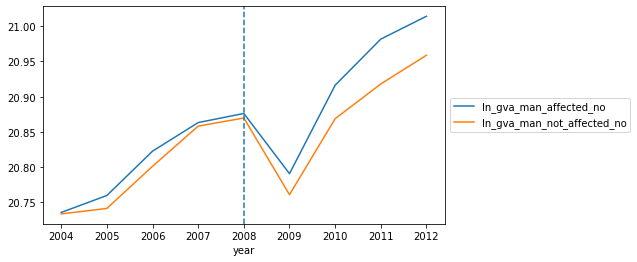

In [22]:
gva_man_affected_no = data[data["county_affected_no"]==1].groupby('year').mean()['ln_gva_man'].rename("ln_gva_man_affected_no") 
gva_man_not_affected_no = data[data["county_affected_no"]==0].groupby('year').mean()['ln_gva_man'].rename("ln_gva_man_not_affected_no")
gva_man_no = pd.concat([gva_man_affected_no, gva_man_not_affected_no], axis=1) 
fig, ax = plt.subplots(figsize=(9,4))
gva_man_no.plot(ax=ax)
ax.axvline(2008, linestyle='--')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

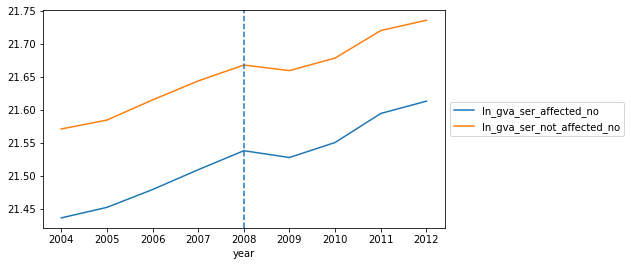

In [23]:
gva_ser_affected_no = data[data["county_affected_no"]==1].groupby('year').mean()['ln_gva_ser'].rename("ln_gva_ser_affected_no") 
gva_ser_not_affected_no = data[data["county_affected_no"]==0].groupby('year').mean()['ln_gva_ser'].rename("ln_gva_ser_not_affected_no")
gva_ser_no = pd.concat([gva_ser_affected_no, gva_ser_not_affected_no], axis=1) 
fig, ax = plt.subplots(figsize=(9,4))
gva_ser_no.plot(ax=ax)
ax.axvline(2008, linestyle='--')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

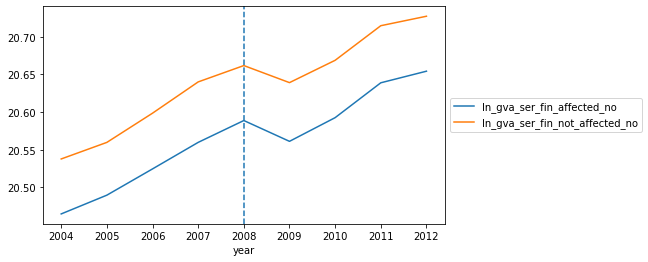

In [24]:
gva_ser_fin_affected_no = data[data["county_affected_no"]==1].groupby('year').mean()['ln_gva_ser_fin'].rename("ln_gva_ser_fin_affected_no") 
gva_ser_fin_not_affected_no = data[data["county_affected_no"]==0].groupby('year').mean()['ln_gva_ser_fin'].rename("ln_gva_ser_fin_not_affected_no")
gva_ser_fin_no = pd.concat([gva_ser_fin_affected_no, gva_ser_fin_not_affected_no], axis=1) 
fig, ax = plt.subplots(figsize=(9,4))
gva_ser_fin_no.plot(ax=ax)
ax.axvline(2008, linestyle='--')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

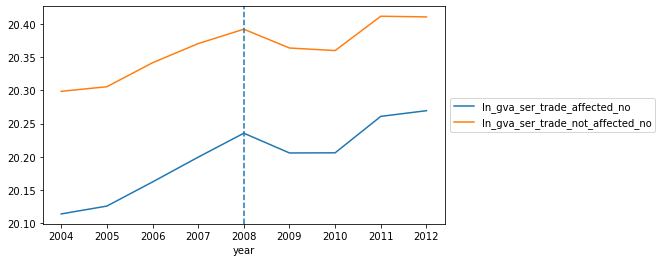

In [25]:
gva_ser_trade_affected_no = data[data["county_affected_no"]==1].groupby('year').mean()['ln_gva_ser_trade'].rename("ln_gva_ser_trade_affected_no") 
gva_ser_trade_not_affected_no = data[data["county_affected_no"]==0].groupby('year').mean()['ln_gva_ser_trade'].rename("ln_gva_ser_trade_not_affected_no")
gva_ser_trade_no = pd.concat([gva_ser_trade_affected_no, gva_ser_trade_not_affected_no], axis=1) 
fig, ax = plt.subplots(figsize=(9,4))
gva_ser_trade_no.plot(ax=ax)
ax.axvline(2008, linestyle='--')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

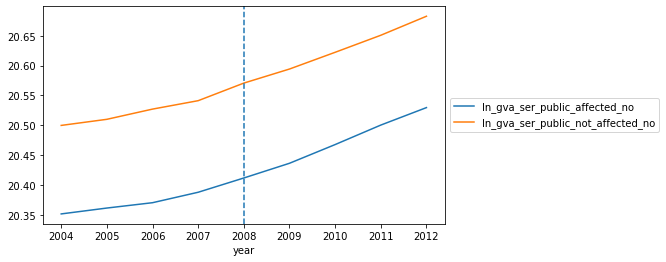

In [26]:
gva_ser_public_affected_no = data[data["county_affected_no"]==1].groupby('year').mean()['ln_gva_ser_public'].rename("ln_gva_ser_public_affected_no") 
gva_ser_public_not_affected_no = data[data["county_affected_no"]==0].groupby('year').mean()['ln_gva_ser_public'].rename("ln_gva_ser_public_not_affected_no")
gva_ser_public_no = pd.concat([gva_ser_public_affected_no, gva_ser_public_not_affected_no], axis=1) 
fig, ax = plt.subplots(figsize=(9,4))
gva_ser_public_no.plot(ax=ax)
ax.axvline(2008, linestyle='--')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# gva toas


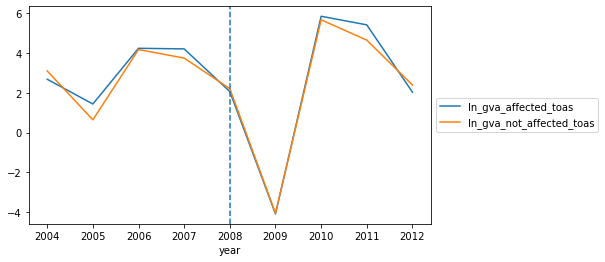

In [27]:
gva_affected_toas = data[data["county_affected_toas"]==1].groupby('year').mean()['ln_gva'].rename("ln_gva_affected_toas") 
gva_not_affected_toas = data[data["county_affected_toas"]==0].groupby('year').mean()['ln_gva'].rename("ln_gva_not_affected_toas")
gval = pd.concat([gva_affected_toas, gva_not_affected_toas], axis=1) 
fig, ax = plt.subplots(figsize=(9,4))
gval.plot(ax=ax)
ax.axvline(2008, linestyle='--')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

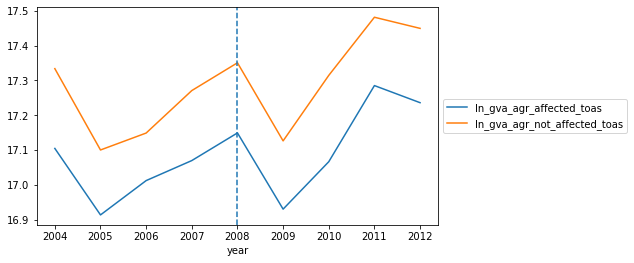

In [28]:
gva_agr_affected_toas = data[data["county_affected_toas"]==1].groupby('year').mean()['ln_gva_agr'].rename("ln_gva_agr_affected_toas") 
gva_agr_not_affected_toas = data[data["county_affected_toas"]==0].groupby('year').mean()['ln_gva_agr'].rename("ln_gva_agr_not_affected_toas")
gva_agr_toas = pd.concat([gva_agr_affected_toas, gva_agr_not_affected_toas], axis=1) 
fig, ax = plt.subplots(figsize=(9,4))
gva_agr_toas.plot(ax=ax)
ax.axvline(2008, linestyle='--')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

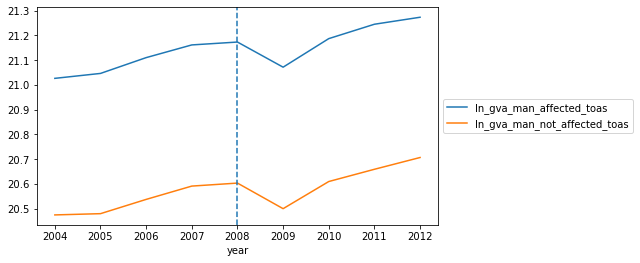

In [29]:
gva_man_affected_toas = data[data["county_affected_toas"]==1].groupby('year').mean()['ln_gva_man'].rename("ln_gva_man_affected_toas") 
gva_man_not_affected_toas = data[data["county_affected_toas"]==0].groupby('year').mean()['ln_gva_man'].rename("ln_gva_man_not_affected_toas")
gva_man_toas = pd.concat([gva_man_affected_toas, gva_man_not_affected_toas], axis=1) 
fig, ax = plt.subplots(figsize=(9,4))
gva_man_toas.plot(ax=ax)
ax.axvline(2008, linestyle='--')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

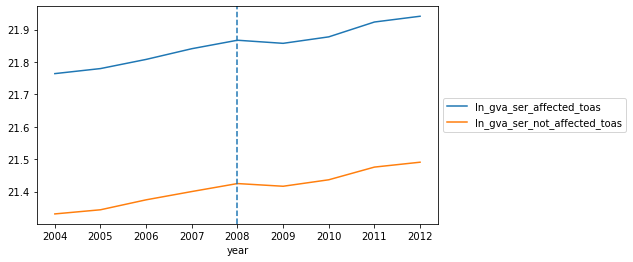

In [30]:
gva_ser_affected_toas = data[data["county_affected_toas"]==1].groupby('year').mean()['ln_gva_ser'].rename("ln_gva_ser_affected_toas") 
gva_ser_not_affected_toas = data[data["county_affected_toas"]==0].groupby('year').mean()['ln_gva_ser'].rename("ln_gva_ser_not_affected_toas")
gva_ser_toas = pd.concat([gva_ser_affected_toas, gva_ser_not_affected_toas], axis=1) 
fig, ax = plt.subplots(figsize=(9,4))
gva_ser_toas.plot(ax=ax)
ax.axvline(2008, linestyle='--')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

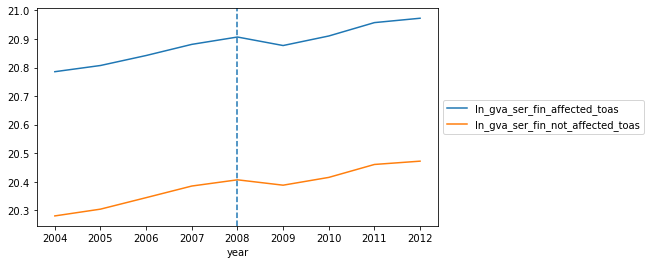

In [31]:
gva_ser_fin_affected_toas = data[data["county_affected_toas"]==1].groupby('year').mean()['ln_gva_ser_fin'].rename("ln_gva_ser_fin_affected_toas") 
gva_ser_fin_not_affected_toas = data[data["county_affected_toas"]==0].groupby('year').mean()['ln_gva_ser_fin'].rename("ln_gva_ser_fin_not_affected_toas")
gva_ser_fin_toas = pd.concat([gva_ser_fin_affected_toas, gva_ser_fin_not_affected_toas], axis=1) 
fig, ax = plt.subplots(figsize=(9,4))
gva_ser_fin_toas.plot(ax=ax)
ax.axvline(2008, linestyle='--')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

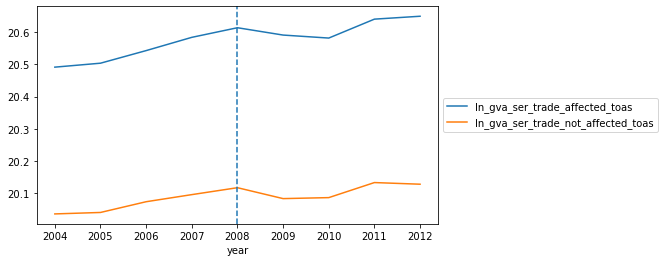

In [32]:
gva_ser_trade_affected_toas = data[data["county_affected_toas"]==1].groupby('year').mean()['ln_gva_ser_trade'].rename("ln_gva_ser_trade_affected_toas") 
gva_ser_trade_not_affected_toas = data[data["county_affected_toas"]==0].groupby('year').mean()['ln_gva_ser_trade'].rename("ln_gva_ser_trade_not_affected_toas")
gva_ser_trade_toas = pd.concat([gva_ser_trade_affected_toas, gva_ser_trade_not_affected_toas], axis=1) 
fig, ax = plt.subplots(figsize=(9,4))
gva_ser_trade_toas.plot(ax=ax)
ax.axvline(2008, linestyle='--')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

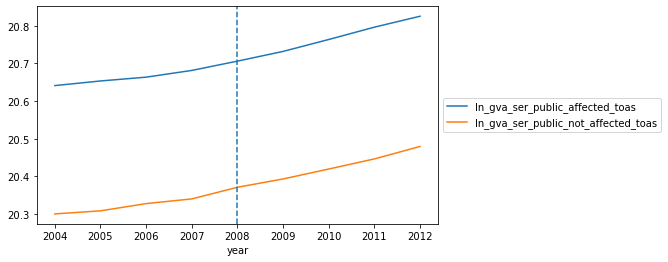

In [33]:
gva_ser_public_affected_toas = data[data["county_affected_toas"]==1].groupby('year').mean()['ln_gva_ser_public'].rename("ln_gva_ser_public_affected_toas") 
gva_ser_public_not_affected_toas = data[data["county_affected_toas"]==0].groupby('year').mean()['ln_gva_ser_public'].rename("ln_gva_ser_public_not_affected_toas")
gva_ser_public_toas = pd.concat([gva_ser_public_affected_toas, gva_ser_public_not_affected_toas], axis=1) 
fig, ax = plt.subplots(figsize=(9,4))
gva_ser_public_toas.plot(ax=ax)
ax.axvline(2008, linestyle='--')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# vow no


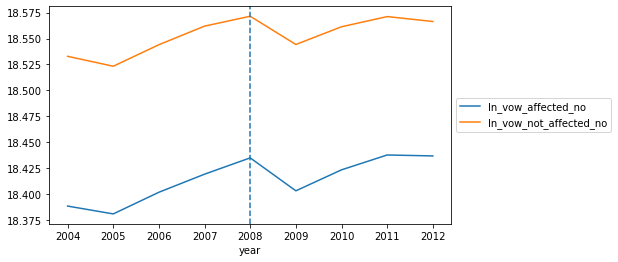

In [34]:
vow_affected_no = data[data["county_affected_no"]==1].groupby('year').mean()['ln_vow'].rename("ln_vow_affected_no") 
vow_not_affected_no = data[data["county_affected_no"]==0].groupby('year').mean()['ln_vow'].rename("ln_vow_not_affected_no")
vowl_no = pd.concat([vow_affected_no, vow_not_affected_no], axis=1) 
fig, ax = plt.subplots(figsize=(9,4))
vowl_no.plot(ax=ax)
ax.axvline(2008, linestyle='--')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

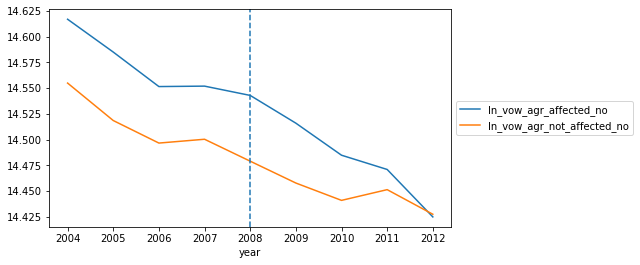

In [35]:
vow_agr_affected_no = data[data["county_affected_no"]==1].groupby('year').mean()['ln_vow_agr'].rename("ln_vow_agr_affected_no") 
vow_agr_not_affected_no = data[data["county_affected_no"]==0].groupby('year').mean()['ln_vow_agr'].rename("ln_vow_agr_not_affected_no")
vow_agr_no = pd.concat([vow_agr_affected_no, vow_agr_not_affected_no], axis=1) 
fig, ax = plt.subplots(figsize=(9,4))
vow_agr_no.plot(ax=ax)
ax.axvline(2008, linestyle='--')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

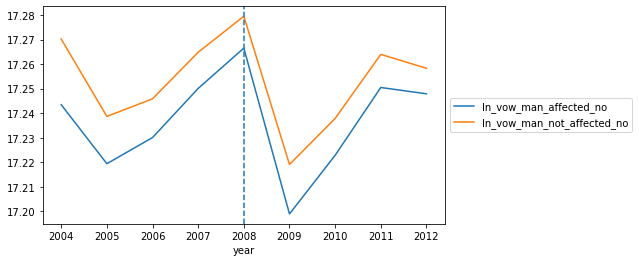

In [36]:
vow_man_affected_no = data[data["county_affected_no"]==1].groupby('year').mean()['ln_vow_man'].rename("ln_vow_man_affected_no") 
vow_man_not_affected_no = data[data["county_affected_no"]==0].groupby('year').mean()['ln_vow_man'].rename("ln_vow_man_not_affected_no")
vow_man_no = pd.concat([vow_man_affected_no, vow_man_not_affected_no], axis=1) 
fig, ax = plt.subplots(figsize=(9,4))
vow_man_no.plot(ax=ax)
ax.axvline(2008, linestyle='--')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

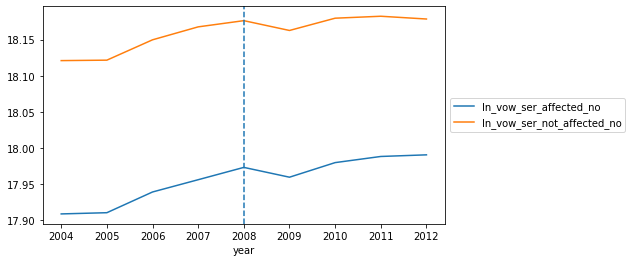

In [37]:
vow_ser_affected_no = data[data["county_affected_no"]==1].groupby('year').mean()['ln_vow_ser'].rename("ln_vow_ser_affected_no") 
vow_ser_not_affected_no = data[data["county_affected_no"]==0].groupby('year').mean()['ln_vow_ser'].rename("ln_vow_ser_not_affected_no")
vow_ser_no = pd.concat([vow_ser_affected_no, vow_ser_not_affected_no], axis=1) 
fig, ax = plt.subplots(figsize=(9,4))
vow_ser_no.plot(ax=ax)
ax.axvline(2008, linestyle='--')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

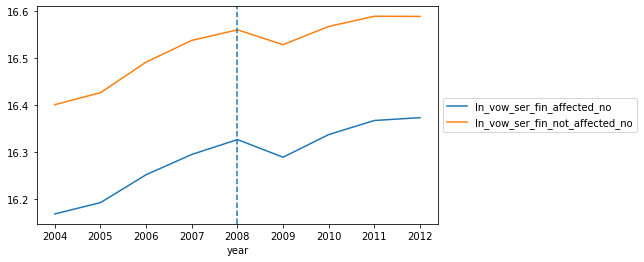

In [38]:
vow_ser_fin_affected_no = data[data["county_affected_no"]==1].groupby('year').mean()['ln_vow_ser_fin'].rename("ln_vow_ser_fin_affected_no") 
vow_ser_fin_not_affected_no = data[data["county_affected_no"]==0].groupby('year').mean()['ln_vow_ser_fin'].rename("ln_vow_ser_fin_not_affected_no")
vow_ser_fin_no = pd.concat([vow_ser_fin_affected_no, vow_ser_fin_not_affected_no], axis=1) 
fig, ax = plt.subplots(figsize=(9,4))
vow_ser_fin_no.plot(ax=ax)
ax.axvline(2008, linestyle='--')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

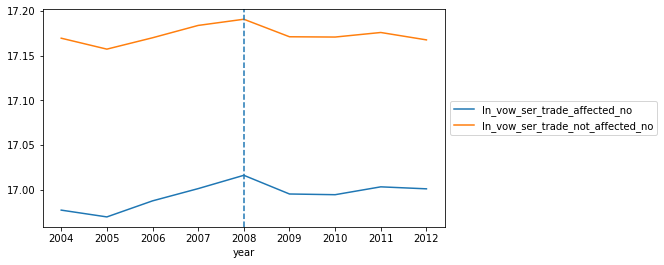

In [39]:
vow_ser_trade_affected_no = data[data["county_affected_no"]==1].groupby('year').mean()['ln_vow_ser_trade'].rename("ln_vow_ser_trade_affected_no") 
vow_ser_trade_not_affected_no = data[data["county_affected_no"]==0].groupby('year').mean()['ln_vow_ser_trade'].rename("ln_vow_ser_trade_not_affected_no")
vow_ser_trade_no = pd.concat([vow_ser_trade_affected_no, vow_ser_trade_not_affected_no], axis=1) 
fig, ax = plt.subplots(figsize=(9,4))
vow_ser_trade_no.plot(ax=ax)
ax.axvline(2008, linestyle='--')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

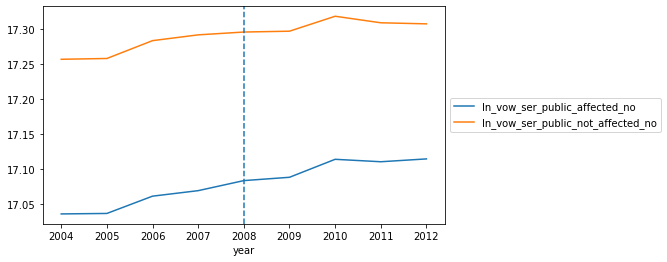

In [40]:
vow_ser_public_affected_no = data[data["county_affected_no"]==1].groupby('year').mean()['ln_vow_ser_public'].rename("ln_vow_ser_public_affected_no") 
vow_ser_public_not_affected_no = data[data["county_affected_no"]==0].groupby('year').mean()['ln_vow_ser_public'].rename("ln_vow_ser_public_not_affected_no")
vow_ser_public_no = pd.concat([vow_ser_public_affected_no, vow_ser_public_not_affected_no], axis=1) 
fig, ax = plt.subplots(figsize=(9,4))
vow_ser_public_no.plot(ax=ax)
ax.axvline(2008, linestyle='--')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# vow toas

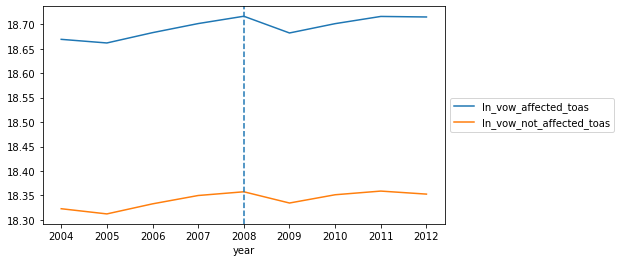

In [41]:
vow_affected_toas = data[data["county_affected_toas"]==1].groupby('year').mean()['ln_vow'].rename("ln_vow_affected_toas") 
vow_not_affected_toas = data[data["county_affected_toas"]==0].groupby('year').mean()['ln_vow'].rename("ln_vow_not_affected_toas")
vowl = pd.concat([vow_affected_toas, vow_not_affected_toas], axis=1) 
fig, ax = plt.subplots(figsize=(9,4))
vowl.plot(ax=ax)
ax.axvline(2008, linestyle='--')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

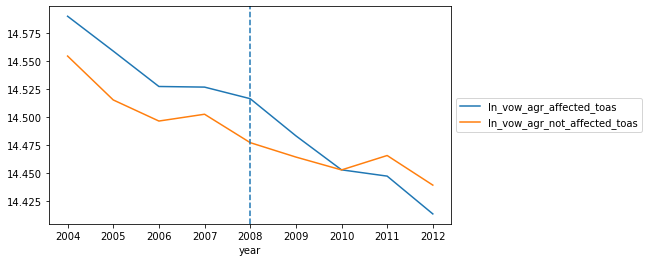

In [42]:
vow_agr_affected_toas = data[data["county_affected_toas"]==1].groupby('year').mean()['ln_vow_agr'].rename("ln_vow_agr_affected_toas") 
vow_agr_not_affected_toas = data[data["county_affected_toas"]==0].groupby('year').mean()['ln_vow_agr'].rename("ln_vow_agr_not_affected_toas")
vow_agr_toas = pd.concat([vow_agr_affected_toas, vow_agr_not_affected_toas], axis=1) 
fig, ax = plt.subplots(figsize=(9,4))
vow_agr_toas.plot(ax=ax)
ax.axvline(2008, linestyle='--')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

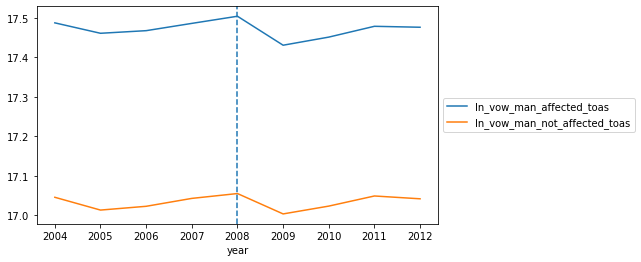

In [43]:
vow_man_affected_toas = data[data["county_affected_toas"]==1].groupby('year').mean()['ln_vow_man'].rename("ln_vow_man_affected_toas") 
vow_man_not_affected_toas = data[data["county_affected_toas"]==0].groupby('year').mean()['ln_vow_man'].rename("ln_vow_man_not_affected_toas")
vow_man_toas = pd.concat([vow_man_affected_toas, vow_man_not_affected_toas], axis=1) 
fig, ax = plt.subplots(figsize=(9,4))
vow_man_toas.plot(ax=ax)
ax.axvline(2008, linestyle='--')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

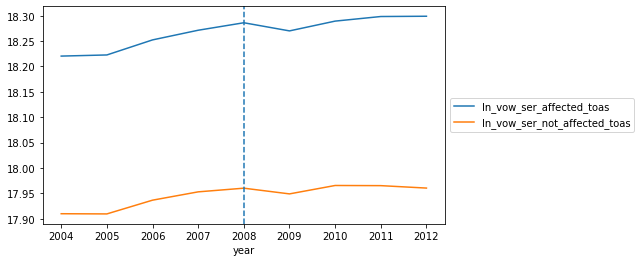

In [44]:
vow_ser_affected_toas = data[data["county_affected_toas"]==1].groupby('year').mean()['ln_vow_ser'].rename("ln_vow_ser_affected_toas") 
vow_ser_not_affected_toas = data[data["county_affected_toas"]==0].groupby('year').mean()['ln_vow_ser'].rename("ln_vow_ser_not_affected_toas")
vow_ser_toas = pd.concat([vow_ser_affected_toas, vow_ser_not_affected_toas], axis=1) 
fig, ax = plt.subplots(figsize=(9,4))
vow_ser_toas.plot(ax=ax)
ax.axvline(2008, linestyle='--')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

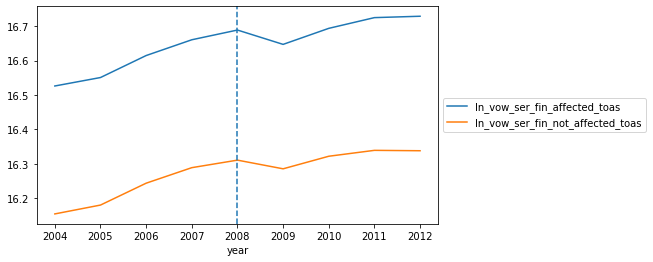

In [45]:
vow_ser_fin_affected_toas = data[data["county_affected_toas"]==1].groupby('year').mean()['ln_vow_ser_fin'].rename("ln_vow_ser_fin_affected_toas") 
vow_ser_fin_not_affected_toas = data[data["county_affected_toas"]==0].groupby('year').mean()['ln_vow_ser_fin'].rename("ln_vow_ser_fin_not_affected_toas")
vow_ser_fin_toas = pd.concat([vow_ser_fin_affected_toas, vow_ser_fin_not_affected_toas], axis=1) 
fig, ax = plt.subplots(figsize=(9,4))
vow_ser_fin_toas.plot(ax=ax)
ax.axvline(2008, linestyle='--')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

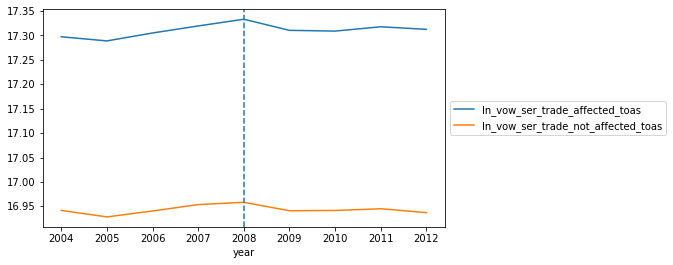

In [46]:
vow_ser_trade_affected_toas = data[data["county_affected_toas"]==1].groupby('year').mean()['ln_vow_ser_trade'].rename("ln_vow_ser_trade_affected_toas") 
vow_ser_trade_not_affected_toas = data[data["county_affected_toas"]==0].groupby('year').mean()['ln_vow_ser_trade'].rename("ln_vow_ser_trade_not_affected_toas")
vow_ser_trade_toas = pd.concat([vow_ser_trade_affected_toas, vow_ser_trade_not_affected_toas], axis=1) 
fig, ax = plt.subplots(figsize=(9,4))
vow_ser_trade_toas.plot(ax=ax)
ax.axvline(2008, linestyle='--')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

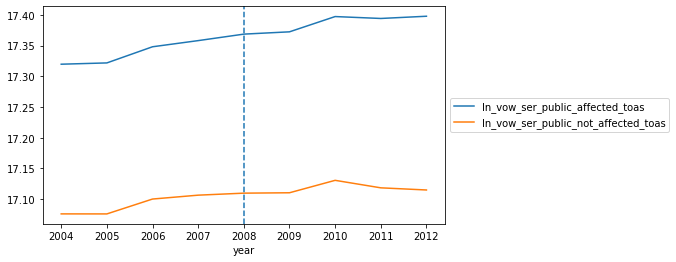

In [47]:
vow_ser_public_affected_toas = data[data["county_affected_toas"]==1].groupby('year').mean()['ln_vow_ser_public'].rename("ln_vow_ser_public_affected_toas") 
vow_ser_public_not_affected_toas = data[data["county_affected_toas"]==0].groupby('year').mean()['ln_vow_ser_public'].rename("ln_vow_ser_public_not_affected_toas")
vow_ser_public_toas = pd.concat([vow_ser_public_affected_toas, vow_ser_public_not_affected_toas], axis=1) 
fig, ax = plt.subplots(figsize=(9,4))
vow_ser_public_toas.plot(ax=ax)
ax.axvline(2008, linestyle='--')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [48]:
print(":D")

:D


In [50]:
# affected_before_no = data.query("county_affected_no==1 & year_post==0")["ln_emp"].mean()

# affected_after_no = data.query("county_affected_no==1& year_post==1")["ln_emp"].mean()
# not_affected_after_no = data.query("county_affected_no==0 & year_post==1")["ln_emp"].mean()
# not_affected_before_no = data.query("county_affected_no==0 & year_post==0")["ln_emp"].mean()
# plt.figure(figsize=(10,5))
# plt.plot(["before", "2008"], [affected_before_no, affected_after_no], label="affected", lw=2)
# plt.plot(["2008","after"], [not_affected_after_no,not_affected_before_no], label="not_affected", lw=2)
# plt.legend();